In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/BABA.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,201.220001,208.020004,199.500000,205.470001,205.470001,24574700
1,2020-01-28,209.740005,210.910004,207.169998,210.229996,210.229996,16196700
2,2020-01-29,212.559998,213.979996,209.520004,212.020004,212.020004,12871900
3,2020-01-30,207.880005,209.860001,205.029999,208.580002,208.580002,14376000
4,2020-01-31,206.500000,207.929993,204.727997,206.589996,206.589996,18181400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2022-12-09,93.269997,93.750000,91.224998,91.339996,91.339996,15452100
726,2022-12-12,90.089996,90.889000,87.750000,89.410004,89.410004,15190200
727,2022-12-13,93.449997,94.980003,90.300003,91.410004,91.410004,21150600
728,2022-12-14,91.059998,91.264999,89.500000,90.910004,90.910004,15575500
729,2022-12-15,93.089996,94.080002,86.050003,86.209999,86.209999,30419400


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,178.962059,181.440752,176.069603,178.768795,178.768795,2.221849e+07
std,68.943852,69.234565,68.348741,68.883518,68.883518,1.487146e+07
min,63.200001,64.099998,58.009998,63.150002,63.150002,6.231400e+06
25%,112.687498,114.555000,108.702497,109.854997,109.854997,1.393932e+07
50%,195.559998,197.720001,192.840004,195.285004,195.285004,1.858180e+07
75%,230.672493,235.244999,228.044998,230.889999,230.889999,2.434102e+07
max,313.500000,319.320007,308.910004,317.140015,317.140015,1.598343e+08


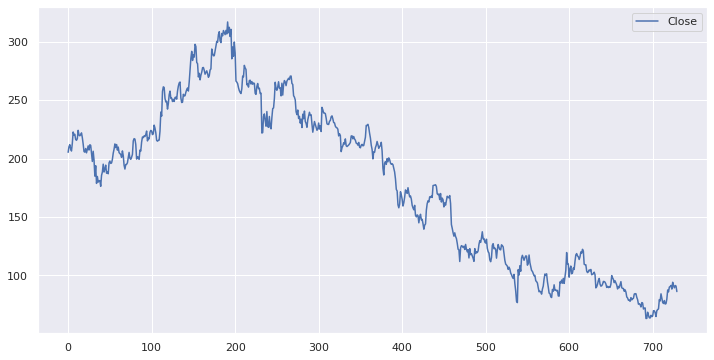

In [6]:
df[['Close']].plot(figsize=(12,6));


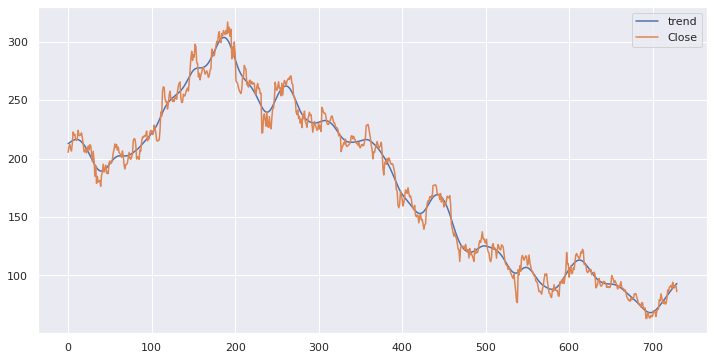

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-0.5260263240796526,
 0.8868367913552724,
 3,
 726,
 {'1%': -3.4393893552577723,
  '5%': -2.8655292671104644,
  '10%': -2.5688943376666744},
 4399.897251279829)

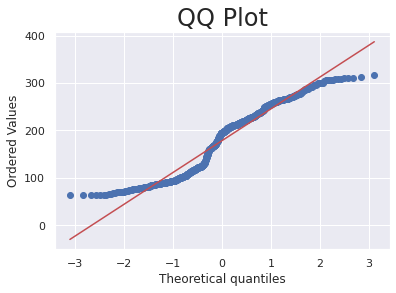

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


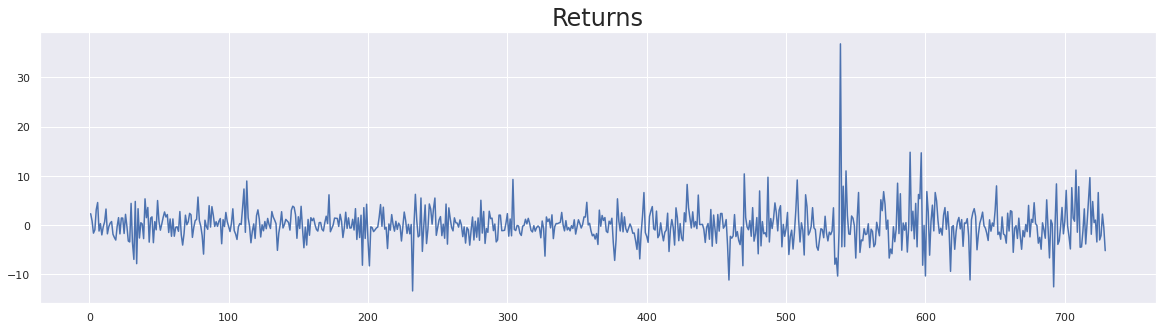

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


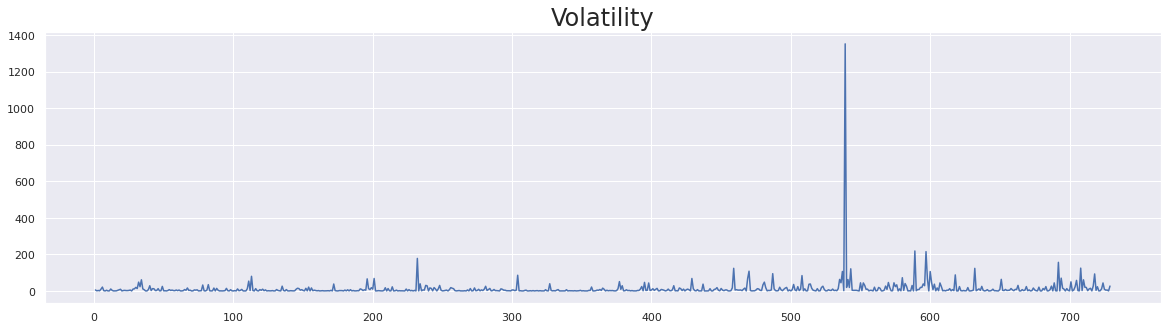

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

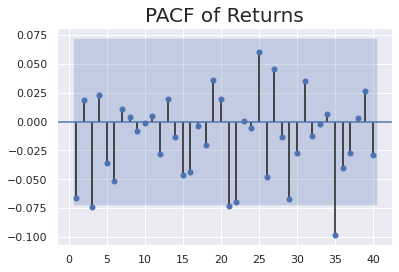

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

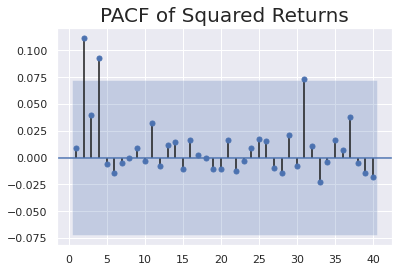

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 37.1 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2147.591120491278
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1952.3215015271217
Iteration:      3,   Func. Count:     15,   Neg. LLF: 2361.7615514907106
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1953.6750629183648
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1952.043305710847
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1952.0161174518475
Iteration:      7,   Func. Count:     35,   Neg. LLF: 1952.0114545573645
Iteration:      8,   Func. Count:     39,   Neg. LLF: 1952.0110100112927
Iteration:      9,   Func. Count:     43,   Neg. LLF: 1952.0110063593675
Iteration:     10,   Func. Count:     46,   Neg. LLF: 1952.0110063593593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1952.0110063593675
            Iterations: 10
            Function evaluations: 46
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1952.01
Distribution:                  Normal   AIC:                           3910.02
Method:            Maximum Likelihood   BIC:                           3923.80
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0470      0.128     -0.366      0.714 [ -0.299,  0.205]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         12.1863      2.484      4.906  9.293e-07 [  7.318, 17.055]
alpha[1]       0.0188  6.106e-02      0.308      0.758 [ -0.101,  0.138]
========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 1899.4568293420898
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1897.493650720421
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1897.493650720421
            Iterations: 11
            Function evaluations: 61
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1897.49
Distribution:                  Normal   AIC:                           3802.99
Method:            Maximum Likelihood   BIC:                           3821.35
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1179      0.121     -0.975      0.329 [ -0.355,  0.119]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          7.5558      1.036      7.293  3.034e-13    [  5.525,  9.586]
alpha[1]       0.0626  7.203e-02      0.869      0.385 [-7.855e-02,  0.204]
alpha[2]       0.3396      0.144      2.355  1.852e-02  [5.696e-02,  0.622]
===========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1996.9001353099784
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1894.3341649786182
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1894.3341529477868
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1894.33
Distribution:                  Normal   AIC:                           3798.67
Method:            Maximum Likelihood   BIC:                           3821.63
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0323      0.140     -0.231      0.817 [ -0.306,  0.241]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          6.8393      1.228      5.569  2.562e-08    [  4.432,  9.246]
alpha[1]       0.0505      0.104      0.488      0.626    [ -0.152,  0.253]
alpha[2]       0.3107      0.140      2.213  2.693e-02  [3.548e-02,  0.586]
alpha[3]       0.1041  9.308e-02      1.119      0.263 [-7.829e-02,  0.287]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 1926.0315330681744
Iteration:     10,   Func. Count:    172,   Neg. LLF: 1885.0358389205458
Iteration:     15,   Func. Count:    258,   Neg. LLF: 1884.8331101681858
Iteration:     20,   Func. Count:    343,   Neg. LLF: 1883.5017885226084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1883.4999751469463
            Iterations: 24
            Function evaluations: 406
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1883.50
Distribution:                  Normal   AIC:                           3797.00
Method:            Maximum Likelihood   BIC:                           3865.88
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0907      0.156     -0.582      0.561 [ -0.396,  0.215]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          4.8811      1.515      3.222  1.275e-03      [  1.911,  7.851]
alpha[1]   2.6448e-11  1.421e-02  1.861e-09      1.000 [-2.785e-02,2.785e-02]
alpha[2]       0.2955      0.147      2.006  4.488e-02    [6.752e-03,  0.584]
alpha[3]       0.0950      0.117      0.810      0.418      [ -0.135,  0.325]
alpha[4]   6.3239e-03  1.949e-02      0.325      0.746 [-3.187e-02,4.451e-02]
alpha[5]   1.5222e-11      0.149  1.019e-10      1.000      [ -0.293,  0.293]
alpha[6]       0.0945  7.080e-02      1.335      0.182   [-4.421e-02,  0.233]
alpha[7]   1.2524e-12  3.777e-02  3.316e-11      1.000 [-7.403e-02,7.403e-02]
alpha[8]       0.0283      0.106      0.266      0.790      [ -0.180,  0.237]
alpha[9]       0.0154  5.029e-02      0.306      0.760   [-8.320e-02,  0.114]
alpha[10]  2.8237e-11      0.216  1.310e-10      1.000      [ -0.422,  0.422]
alpha[11]      0.1032  8.329e-02      1.240      0.215   [-6.000e-02,  0.266]
alpha[12]  9.8962e-11  1.910e-02  5.182e-09      1.000 [-3.743e-02,3.743e-02]
alpha[13]      0.0170  5.901e-02      0.287      0.774   [-9.871e-02,  0.133]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 2084.442091702188
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1897.0264397571336
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1897.0264397574042
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1897.03
Distribution:                  Normal   AIC:                           3802.05
Method:            Maximum Likelihood   BIC:                           3820.42
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -4.0911e-03      0.120 -3.397e-02      0.973 [ -0.240,  0.232]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.1553      0.571      2.022  4.318e-02  [3.544e-02,  2.275]
alpha[1]       0.1802      0.115      1.566      0.117 [-4.528e-02,  0.406]
beta[1]        0.7442      0.103      7.249  4.198e-13    [  0.543,  0.945]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 2014.8915953973756
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1897.026546770374
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1897.0264396870894
            Iterations: 13
            Function evaluations: 87
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1897.03
Distribution:                  Normal   AIC:                           3804.05
Method:            Maximum Likelihood   BIC:                           3827.01
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -4.0878e-03      0.115 -3.540e-02      0.972 [ -0.230,  0.222]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.1553      0.547      2.112  3.469e-02 [8.313e-02,  2.227]
alpha[1]       0.1802  8.519e-02      2.115  3.443e-02 [1.321e-02,  0.347]
beta[1]        0.7442      0.316      2.355  1.850e-02   [  0.125,  1.363]
beta[2]        0.0000      0.356      0.000      1.000   [ -0.697,  0.697]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1902.5914141782837
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1897.0288710483828
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1897.0264398872935
            Iterations: 13
            Function evaluations: 100
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1897.03
Distribution:                  Normal   AIC:                           3806.05
Method:            Maximum Likelihood   BIC:                           3833.60
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -4.0914e-03      0.118 -3.462e-02      0.972 [ -0.236,  0.228]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.1553      0.563      2.053  4.012e-02  [5.211e-02,  2.259]
alpha[1]       0.1802  9.364e-02      1.924  5.432e-02 [-3.342e-03,  0.364]
beta[1]        0.7442      0.628      1.186      0.236    [ -0.486,  1.974]
beta[2]    4.9506e-14      1.340  3.696e-14      1.000    [ -2.625,  2.625]
beta[3]    2.6395e-14      0.698  3.783e-14      1.000    [ -1.367,  1.367]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1906.9208487324727
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1892.0631728282667
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1892.063005754413
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1892.06
Distribution:                  Normal   AIC:                           3794.13
Method:            Maximum Likelihood   BIC:                           3817.08
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0294      0.130     -0.226      0.821 [ -0.285,  0.226]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.9570      1.981      0.988      0.323   [ -1.926,  5.840]
alpha[1]       0.0140      0.153  9.189e-02      0.927   [ -0.285,  0.313]
alpha[2]       0.1933      0.168      1.151      0.250   [ -0.136,  0.523]
beta[1]        0.6425      0.297      2.164  3.045e-02 [6.064e-02,  1.224]
==========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1894.5919251984399
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1892.065051681762
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1892.0630059207824
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1892.06
Distribution:                  Normal   AIC:                           3796.13
Method:            Maximum Likelihood   BIC:                           3823.68
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0295      0.347 -8.489e-02      0.932 [ -0.710,  0.651]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.9569     11.800      0.166      0.868 [-21.171, 25.085]
alpha[1]       0.0140      0.257  5.439e-02      0.957 [ -0.490,  0.518]
alpha[2]       0.1933      0.152      1.272      0.203 [ -0.105,  0.491]
alpha[3]   1.3646e-12      0.955  1.429e-12      1.000 [ -1.872,  1.872]
beta[1]        0.6425      1.950      0.330      0.742 [ -3.179,  4.464]
========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 3130.2536064393753
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1876.8361884069218
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1876.836188405173
            Iterations: 10
            Function evaluations: 78
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1876.84
Distribution:                  Normal   AIC:                           3763.67
Method:            Maximum Likelihood   BIC:                           3786.63
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1152      0.116     -0.991      0.322 [ -0.343,  0.113]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0626  7.094e-02      0.883      0.377 [-7.642e-02,  0.202]
alpha[1]       0.1211  9.908e-02      1.223      0.222 [-7.306e-02,  0.315]
gamma[1]      -0.1089  6.263e-02     -1.740  8.195e-02  [ -0.232,1.381e-02]
beta[1]        0.9778  2.659e-02     36.776 4.512e-296    [  0.926,  1.030]
===========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1880.93
Distribution:                  Normal   AIC:                           3771.86
Method:            Maximum Likelihood   BIC:                           3794.82
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:49   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1302      0.110     -1.186      0.236 [ -0.345,8.501e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.3382      0.449      0.753      0.451      [ -0.542,  1.218]
alpha[1]   9.4380e-03  2.789e-02      0.338      0.735 [-4.523e-02,6.410e-02]
gamma[1]       0.1717      0.137      1.255      0.209   [-9.640e-02,  0.440]
beta[1]        0.8924      0.104      8.560  1.133e-17      [  0.688,  1.097]
=============================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1877.5349597992763
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1874.9542293933312
Iteration:     15,   Func. Count:    106,   Neg. LLF: 1874.6363221741094
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1874.6362782309884
            Iterations: 18
            Function evaluations: 124
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1874.64
Distribution:                  Normal   AIC:                           3759.27
Method:            Maximum Likelihood   BIC:                           3782.23
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1270      0.116     -1.096      0.273 [ -0.354,  0.100]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0747  7.835e-02      0.953      0.341   [-7.889e-02,  0.228]
alpha[1]   3.7203e-03  3.222e-02      0.115      0.908 [-5.944e-02,6.688e-02]
gamma[1]       0.1257  7.490e-02      1.678  9.330e-02   [-2.110e-02,  0.272]
beta[1]        0.9313  6.185e-02     15.058  3.041e-51      [  0.810,  1.053]
=============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1889.197673542828
Iteration:     10,   Func. Count:     67,   Neg. LLF: 1888.8167510814073
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1888.8167510814073
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1888.82
Distribution:                  Normal   AIC:                           3787.63
Method:            Maximum Likelihood   BIC:                           3810.59
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         9.8386e-03      0.114  8.640e-02      0.931 [ -0.213,  0.233]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.7779      1.136      1.564      0.118   [ -0.449,  4.005]
phi        6.6495e-14      0.565  1.178e-13      1.000   [ -1.106,  1.106]
d              0.3215      0.149      2.155  3.113e-02 [2.914e-02,  0.614]
beta           0.2466      0.345      0.715      0.475   [ -0.430,  0.923]
==========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 2064.8670027519884
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1975.5906235211642
Iteration:     15,   Func. Count:     78,   Neg. LLF: 1952.0348161089814
Iteration:     20,   Func. Count:     98,   Neg. LLF: 1952.0110063595057
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1952.0110063595057
            Iterations: 20
            Function evaluations: 98
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1952.01
Distribution:                  Normal   AIC:                           3910.02
Method:            Maximum Likelihood   BIC:                           3923.80
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0470      0.128     -0.366      0.714 [ -0.299,  0.205]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         12.1862      2.484      4.906  9.295e-07 [  7.318, 17.055]
alpha[1]       0.0188  6.107e-02      0.308      0.758 [ -0.101,  0.139]
========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 2898.012068168183
Iteration:     10,   Func. Count:     86,   Neg. LLF: 7004.011427157362
Iteration:     15,   Func. Count:    125,   Neg. LLF: 1876.3397030897345
Iteration:     20,   Func. Count:    162,   Neg. LLF: 1874.843990123059
Iteration:     25,   Func. Count:    198,   Neg. LLF: 1874.4643966302513
Iteration:     30,   Func. Count:    234,   Neg. LLF: 1874.4892011806046
Iteration:     35,   Func. Count:    273,   Neg. LLF: 1876.8421011707064
Iteration:     40,   Func. Count:    310,   Neg. LLF: 1874.2752195991727
Iteration:     45,   Func. Count:    359,   Neg. LLF: 23553.46259826376
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1874.2743236761958
            Iterations: 50
            Function evaluations: 417
            Gradient evaluations: 49


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1874.27
Distribution:                  Normal   AIC:                           3760.55
Method:            Maximum Likelihood   BIC:                           3788.10
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:55:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1054  2.764e-04   -381.393      0.000 [ -0.106, -0.105]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0378      0.107      0.355      0.723 [ -0.171,  0.247]
alpha[1]       0.0483      0.107      0.453      0.651 [ -0.161,  0.258]
gamma[1]       0.9891      0.105      9.377  6.812e-21 [  0.782,  1.196]
beta[1]        0.9517  9.168e-02     10.380  3.063e-25 [  0.772,  1.131]
delta          0.5385      1.550      0.347      0.728 [ -2.500,  3.577]
========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=50.23406851167907, pvalue=1.2354117728818892e-11)

In [46]:
jarque_bera_test.statistic

50.23406851167907

In [47]:
jarque_bera_test.pvalue

1.2354117728818892e-11

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      2.316637
2      0.851452
3     -1.622489
4     -0.954073
5      3.151174
         ...   
725   -3.005206
726   -2.112976
727    2.236886
728   -0.546986
729   -5.169954
Name: returns, Length: 729, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=9568.138782797087, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

9568.138782797087

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

17.532277831004063

coef. asimetria

In [53]:
returns.skew()

1.7428283755214802

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -29.218
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -21.399
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -28.770
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.099
P-value                         0.592
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Open        730 non-null    float64
 2   High        730 non-null    float64
 3   Low         730 non-null    float64
 4   Close       730 non-null    float64
 5   Adj Close   730 non-null    float64
 6   Volume      730 non-null    int64  
 7   trend       730 non-null    float64
 8   returns     729 non-null    float64
 9   sq_returns  729 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 57.2+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/BABA.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,201.220001,208.020004,199.500000,205.470001,205.470001,24574700
1,2020-01-28,209.740005,210.910004,207.169998,210.229996,210.229996,16196700
2,2020-01-29,212.559998,213.979996,209.520004,212.020004,212.020004,12871900
3,2020-01-30,207.880005,209.860001,205.029999,208.580002,208.580002,14376000
4,2020-01-31,206.500000,207.929993,204.727997,206.589996,206.589996,18181400
...,...,...,...,...,...,...,...
725,2022-12-09,93.269997,93.750000,91.224998,91.339996,91.339996,15452100
726,2022-12-12,90.089996,90.889000,87.750000,89.410004,89.410004,15190200
727,2022-12-13,93.449997,94.980003,90.300003,91.410004,91.410004,21150600
728,2022-12-14,91.059998,91.264999,89.500000,90.910004,90.910004,15575500


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,205.470001,24574700
1,2020-01-28,210.229996,16196700
2,2020-01-29,212.020004,12871900
3,2020-01-30,208.580002,14376000
4,2020-01-31,206.589996,18181400
...,...,...,...
725,2022-12-09,91.339996,15452100
726,2022-12-12,89.410004,15190200
727,2022-12-13,91.410004,21150600
728,2022-12-14,90.910004,15575500


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,205.470001,24574700,210.229996
1,2020-01-28,210.229996,16196700,212.020004
2,2020-01-29,212.020004,12871900,208.580002
3,2020-01-30,208.580002,14376000,206.589996
4,2020-01-31,206.589996,18181400,213.100006
...,...,...,...,...
725,2022-12-09,91.339996,15452100,89.410004
726,2022-12-12,89.410004,15190200,91.410004
727,2022-12-13,91.410004,21150600,90.910004
728,2022-12-14,90.910004,15575500,86.209999


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,205.470001,24574700,210.229996
1,2020-01-28,210.229996,16196700,212.020004
2,2020-01-29,212.020004,12871900,208.580002
3,2020-01-30,208.580002,14376000,206.589996
4,2020-01-31,206.589996,18181400,213.100006
...,...,...,...,...
724,2022-12-08,94.169998,29241500,91.339996
725,2022-12-09,91.339996,15452100,89.410004
726,2022-12-12,89.410004,15190200,91.410004
727,2022-12-13,91.410004,21150600,90.910004


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.56033699, 0.11942027, 0.57907786],
       [0.57907786, 0.06487703, 0.58612542],
       [0.58612542, 0.04323161, 0.57258157],
       ...,
       [0.1033899 , 0.05832442, 0.11126423],
       [0.11126423, 0.09712837, 0.10929564],
       [0.10929564, 0.06083284, 0.09079096]])

In [73]:
price_volume_target_scaled_df.shape

(729, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [78]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

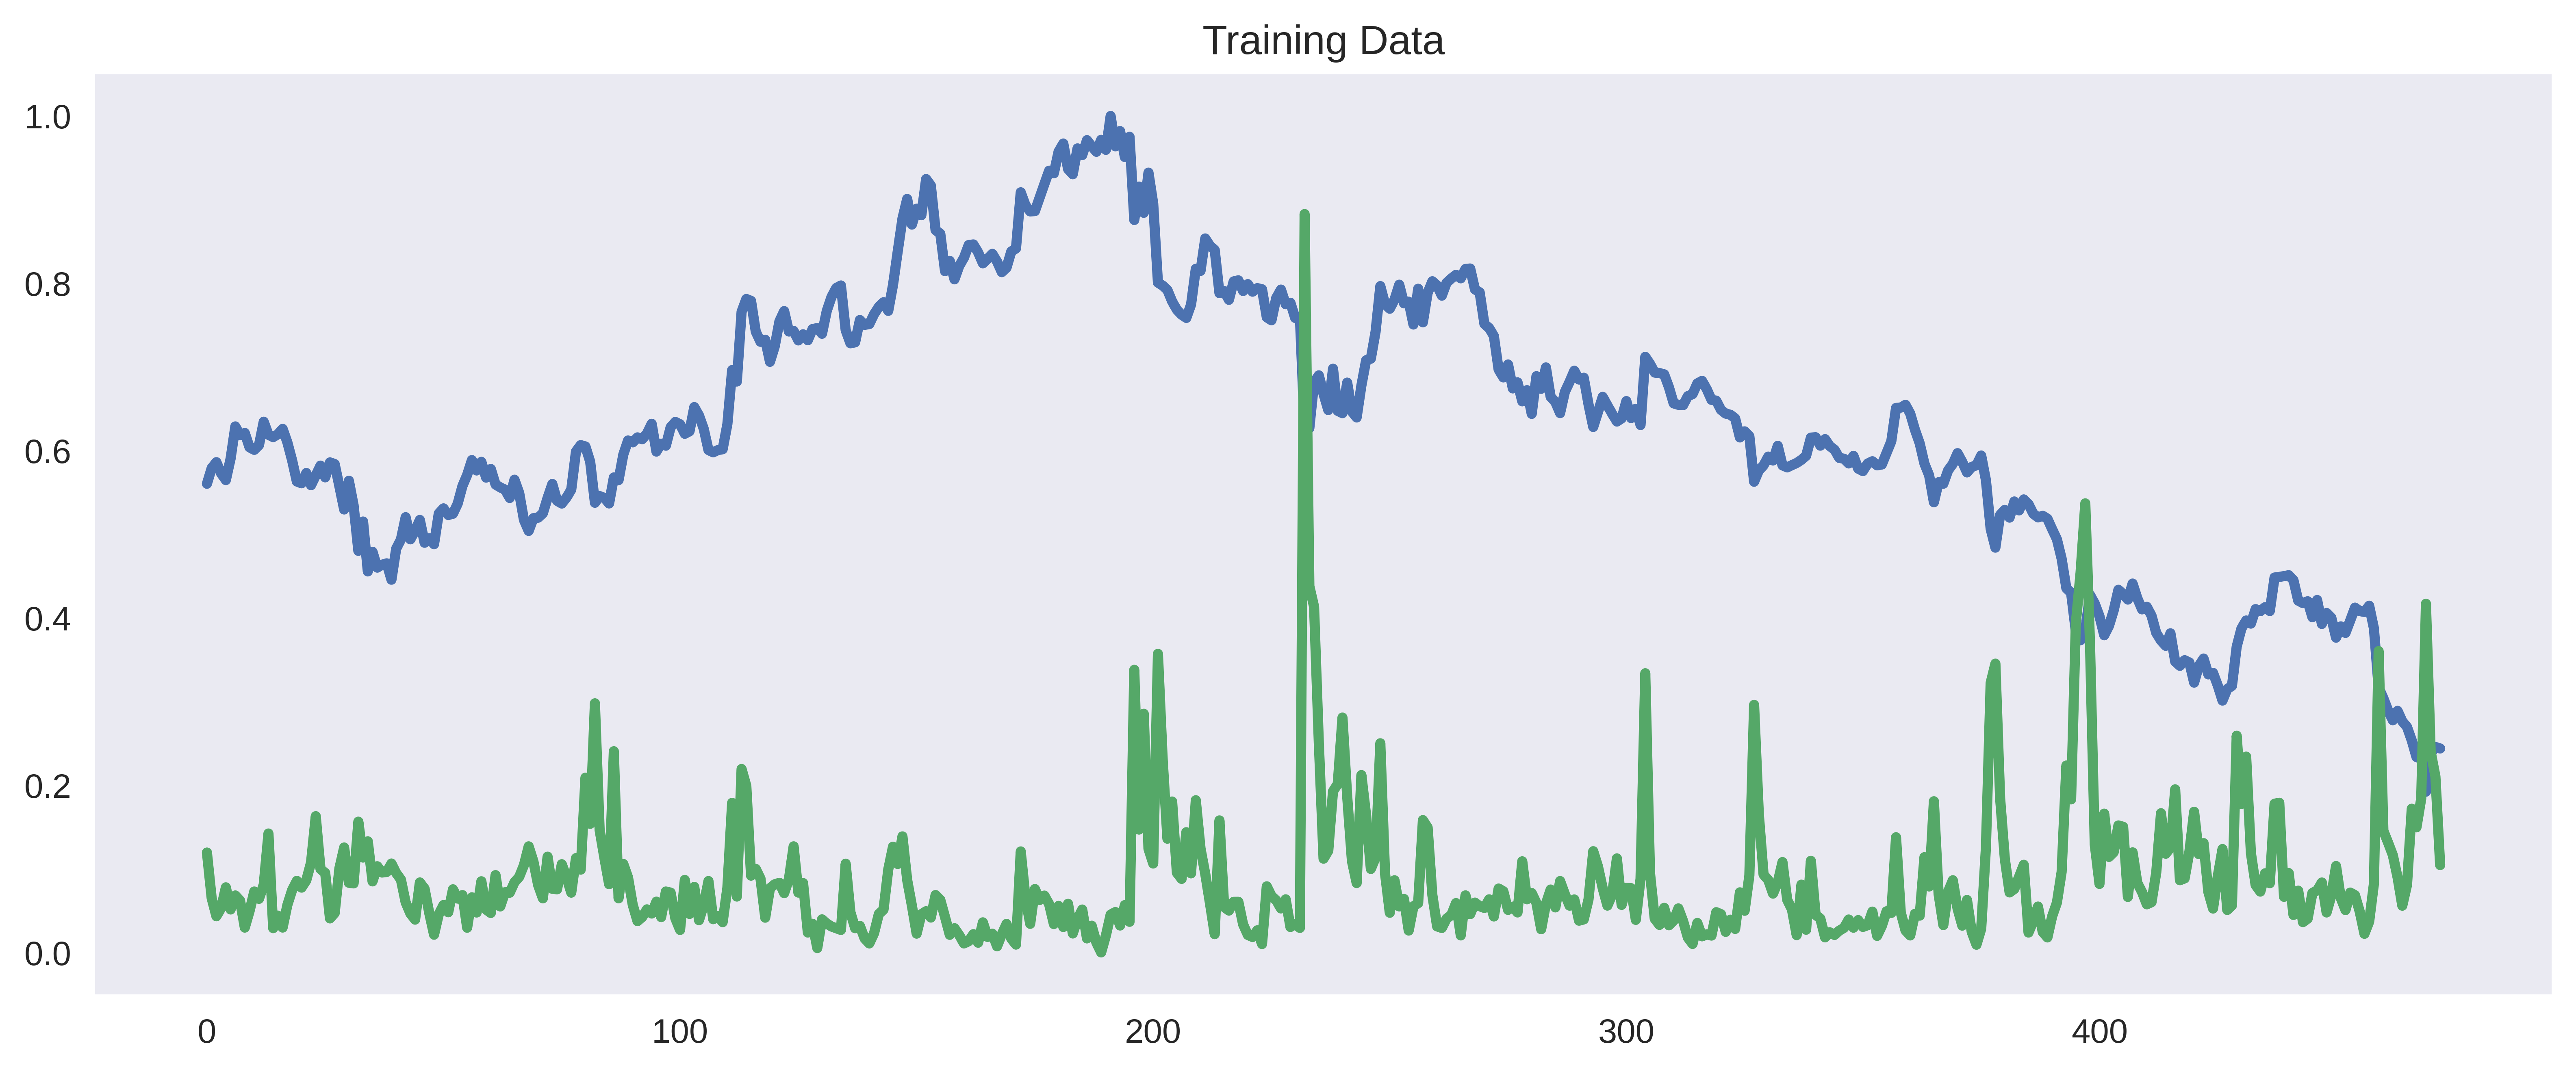

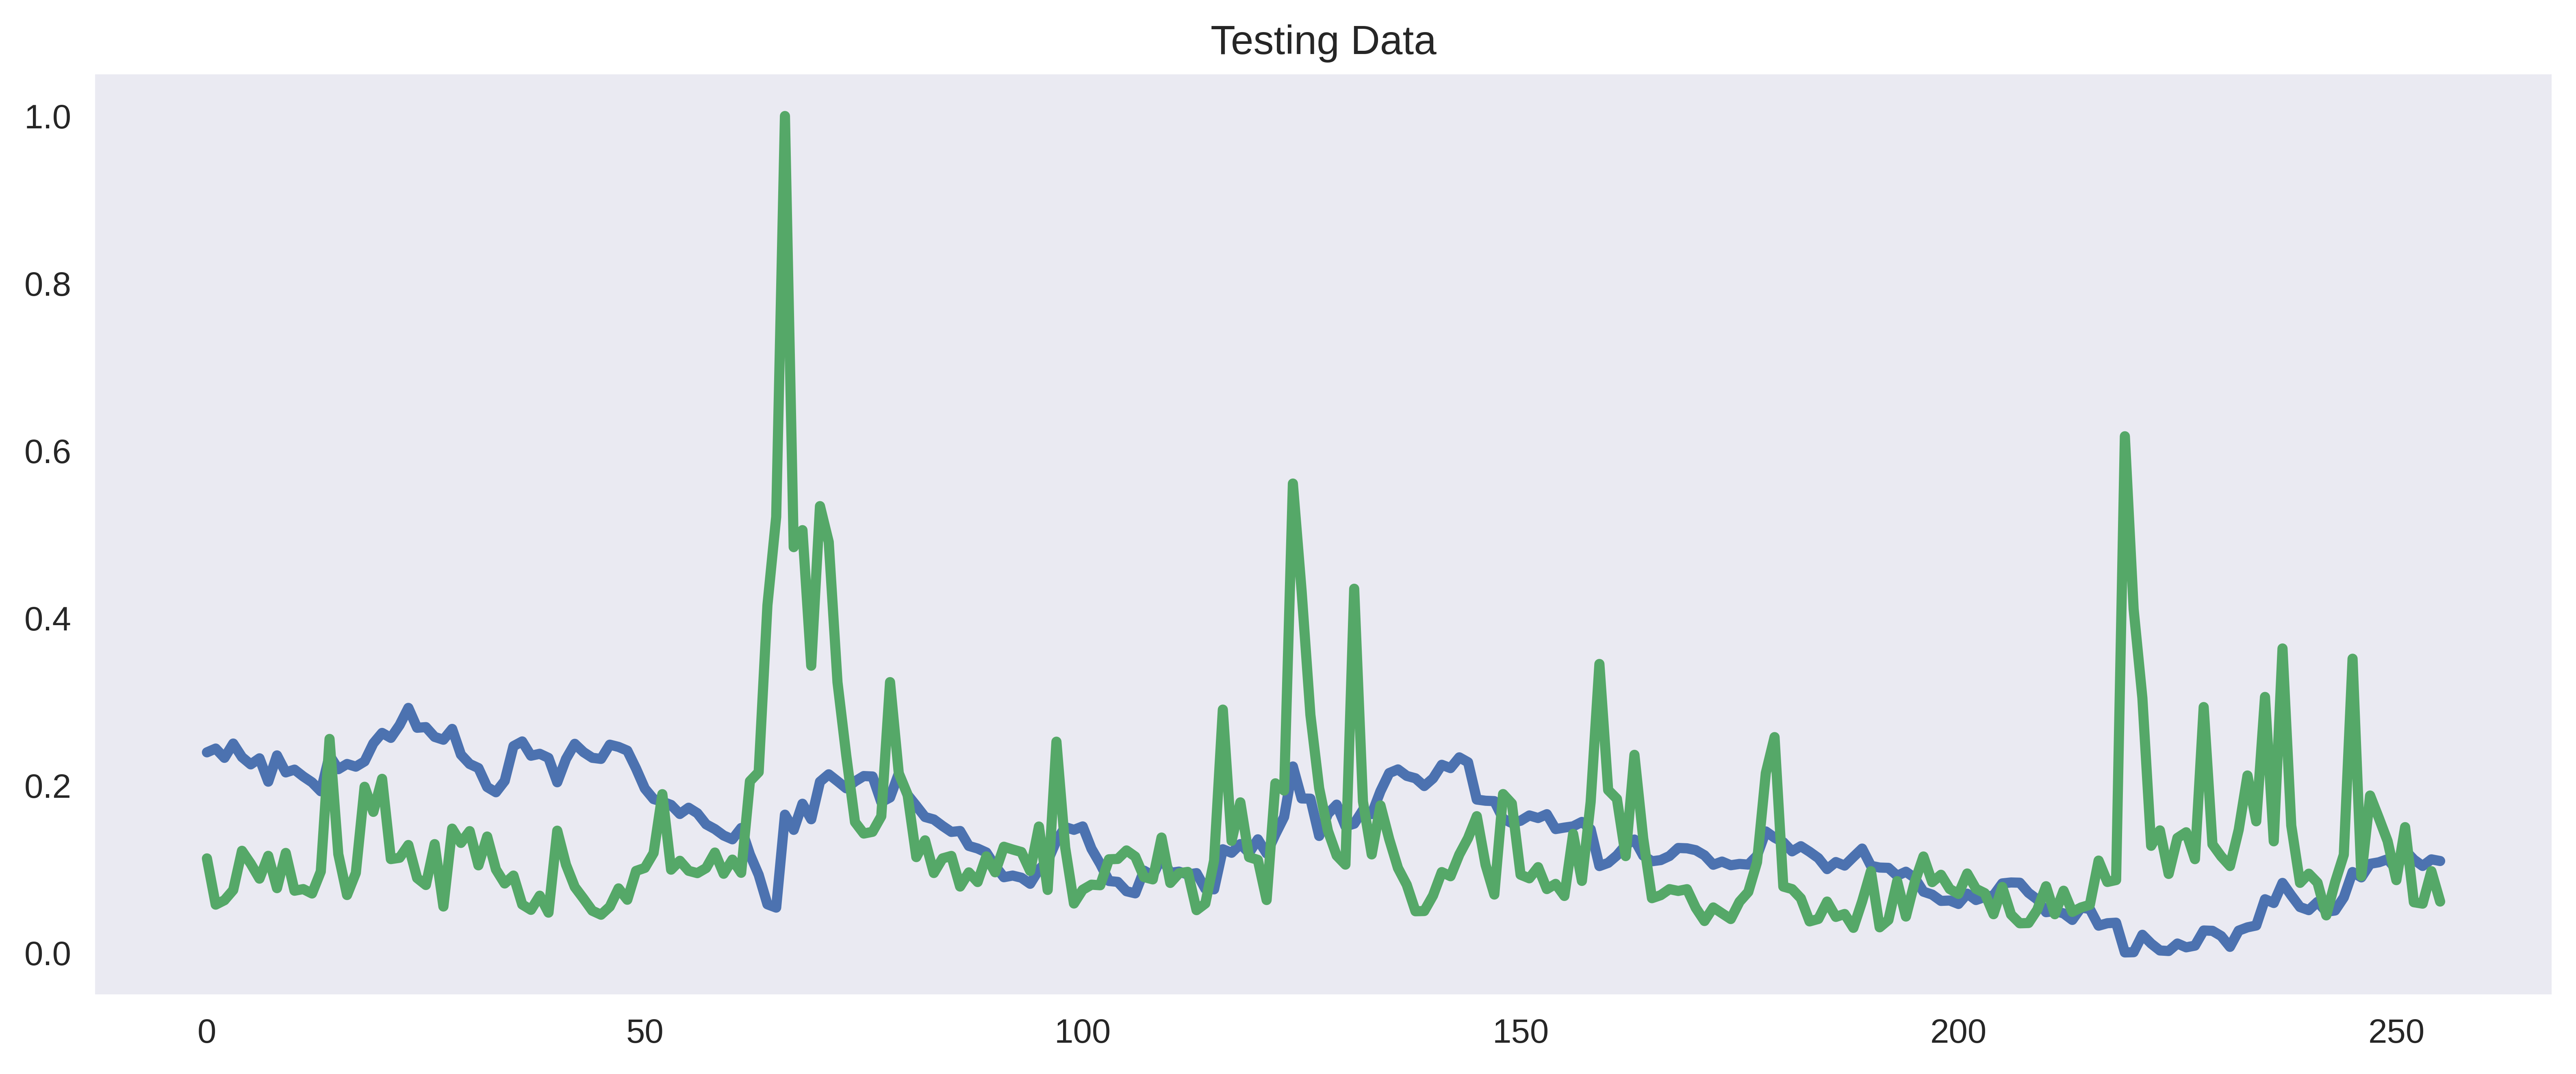

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.6448088163374535


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.56453045],
       [0.58220413],
       [0.58885801],
       [0.57628535],
       [0.56888323],
       [0.59272972],
       [0.62817298],
       [0.61854301],
       [0.62123381],
       [0.60521434],
       [0.60229179],
       [0.60758628],
       [0.63328506],
       [0.61851142],
       [0.61662103],
       [0.61975581],
       [0.62574169],
       [0.61065316],
       [0.59071899],
       [0.56726727],
       [0.56532249],
       [0.57664272],
       [0.56301132],
       [0.57343525],
       [0.58469599],
       [0.57174882],
       [0.58865735],
       [0.5867961 ],
       [0.56163915],
       [0.53609542],
       [0.56811916],
       [0.54092969],
       [0.49022345],
       [0.52287037],
       [0.46765975],
       [0.4896511 ],
       [0.47204168],
       [0.47529152],
       [0.47681406],
       [0.45871327],
       [0.4930016 ],
       [0.50327027],
       [0.52803119],
       [0.503653  ],
       [0.51344582],
       [0.52481606],
       [0.49970742],
       [0.504

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

729

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
724,2022-12-08
725,2022-12-09
726,2022-12-12
727,2022-12-13


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.560337
1,2020-01-28,0.579078
2,2020-01-29,0.586125
3,2020-01-30,0.572582
4,2020-01-31,0.564747
...,...,...
724,2022-12-08,0.122131
725,2022-12-09,0.110989
726,2022-12-12,0.103390
727,2022-12-13,0.111264


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.560337,0.564530
1,2020-01-28,0.579078,0.582204
2,2020-01-29,0.586125,0.588858
3,2020-01-30,0.572582,0.576285
4,2020-01-31,0.564747,0.568883
...,...,...,...
724,2022-12-08,0.122131,0.159680
725,2022-12-09,0.110989,0.149997
726,2022-12-12,0.103390,0.142992
727,2022-12-13,0.111264,0.150001


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,205.470001,24574700,210.229996
1,2020-01-28,210.229996,16196700,212.020004
2,2020-01-29,212.020004,12871900,208.580002
3,2020-01-30,208.580002,14376000,206.589996
4,2020-01-31,206.589996,18181400,213.100006
...,...,...,...,...
725,2022-12-09,91.339996,15452100,89.410004
726,2022-12-12,89.410004,15190200,91.410004
727,2022-12-13,91.410004,21150600,90.910004
728,2022-12-14,90.910004,15575500,86.209999


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,205.470001,24574700,210.229996
1,2020-01-28,210.229996,16196700,212.020004
2,2020-01-29,212.020004,12871900,208.580002
3,2020-01-30,208.580002,14376000,206.589996
4,2020-01-31,206.589996,18181400,213.100006
...,...,...,...,...
725,2022-12-09,91.339996,15452100,89.410004
726,2022-12-12,89.410004,15190200,91.410004
727,2022-12-13,91.410004,21150600,90.910004
728,2022-12-14,90.910004,15575500,86.209999


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.05470001e+02, 2.45747000e+07],
       [2.10229996e+02, 1.61967000e+07],
       [2.12020004e+02, 1.28719000e+07],
       ...,
       [9.14100040e+01, 2.11506000e+07],
       [9.09100040e+01, 1.55755000e+07],
       [8.62099990e+01, 3.04194000e+07]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.56033699]),
 array([0.57907786]),
 array([0.58612542]),
 array([0.57258157]),
 array([0.56474659]),
 array([0.59037756]),
 array([0.62888301]),
 array([0.61841014]),
 array([0.62108738]),
 array([0.603882]),
 array([0.60088978]),
 array([0.6065593]),
 array([0.63451312]),
 array([0.61896134]),
 array([0.61608723]),
 array([0.6195913]),
 array([0.62596948]),
 array([0.60982709]),
 array([0.58836957]),
 array([0.56305364]),
 array([0.56088819]),
 array([0.57321153]),
 array([0.55860463]),
 array([0.57029801]),
 array([0.58203074]),
 array([0.5679751]),
 array([0.5858892]),
 array([0.58392062]),
 array([0.55706914]),
 array([0.52958776]),
 array([0.56395917]),
 array([0.53450921]),
 array([0.480137]),
 array([0.51517773]),
 array([0.45552974]),
 array([0.4789952]),
 array([0.46005745]),
 array([0.46352217]),
 array([0.46517577]),
 array([0.44564742]),
 array([0.48269614]),
 array([0.49375956]),
 array([0.52037481]),
 array([0.49387766]),
 array([0.50442929]),
 array([0.51706755]

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 6s 98ms/step - loss: 0.3981 - val_loss: 0.0405
Epoch 2/20
13/13 [==============================] - 0s 12ms/step - loss: 0.1356 - val_loss: 0.0543
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0241 - val_loss: 0.0403
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0119 - val_loss: 0.0392
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0081 - val_loss: 0.0517
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0074 - val_loss: 0.0386
Epoch 7/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0071 - val_loss: 0.0433
Epoch 8/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0072 - val_loss: 0.0395
Epoch 9/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0069 - val_loss: 0.0347
Epoch 10/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 0.0329
Epoch 11/

In [102]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 3ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.5879917,
 0.6030318,
 0.60871834,
 0.5978051,
 0.59151995,
 0.6121573,
 0.6435763,
 0.63498133,
 0.63717496,
 0.6231195,
 0.6206852,
 0.62530005,
 0.64821213,
 0.6354326,
 0.6330799,
 0.6359489,
 0.6411815,
 0.6279649,
 0.61053246,
 0.59016466,
 0.58843243,
 0.5983113,
 0.5866074,
 0.59597117,
 0.6054124,
 0.5941073,
 0.6085274,
 0.6069376,
 0.5853812,
 0.56356925,
 0.5908894,
 0.56745684,
 0.52495414,
 0.55223286,
 0.5060408,
 0.52407205,
 0.5095058,
 0.51216197,
 0.513431,
 0.4985015,
 0.5269326,
 0.5355107,
 0.5563134,
 0.53560245,
 0.54382193,
 0.5537156,
 0.5324533,
 0.5365513,
 0.5310792,
 0.55981374,
 0.564626,
 0.558357,
 0.5595657,
 0.56910765,
 0.58582133,
 0.59650844,
 0.6107555,
 0.6007177,
 0.60906833,
 0.5938864,
 0.6021757,
 0.5872679,
 0.5845014,
 0.58239776,
 0.57444364,
 0.5918669,
 0.57919955,
 0.5537156,
 0.54345304,
 0.5553851,
 0.55584925,
 0.5599378,
 0.5745688,
 0.5877715,
 0.5718206,
 0.5691701,
 0.5749124,
 0.5823663,
 0.61911744,
 0.625268,
 0.623953,
 0.6

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
725,2022-12-09
726,2022-12-12
727,2022-12-13
728,2022-12-14


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.587992
2,2020-01-29,0.603032
3,2020-01-30,0.608718
4,2020-01-31,0.597805
5,2020-02-03,0.591520
...,...,...
725,2022-12-09,0.269066
726,2022-12-12,0.261750
727,2022-12-13,0.256782
728,2022-12-14,0.261930


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.587992,0.579078
2,2020-01-29,0.603032,0.586125
3,2020-01-30,0.608718,0.572582
4,2020-01-31,0.597805,0.564747
5,2020-02-03,0.591520,0.590378
...,...,...,...
725,2022-12-09,0.269066,0.110989
726,2022-12-12,0.261750,0.103390
727,2022-12-13,0.256782,0.111264
728,2022-12-14,0.261930,0.109296


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")